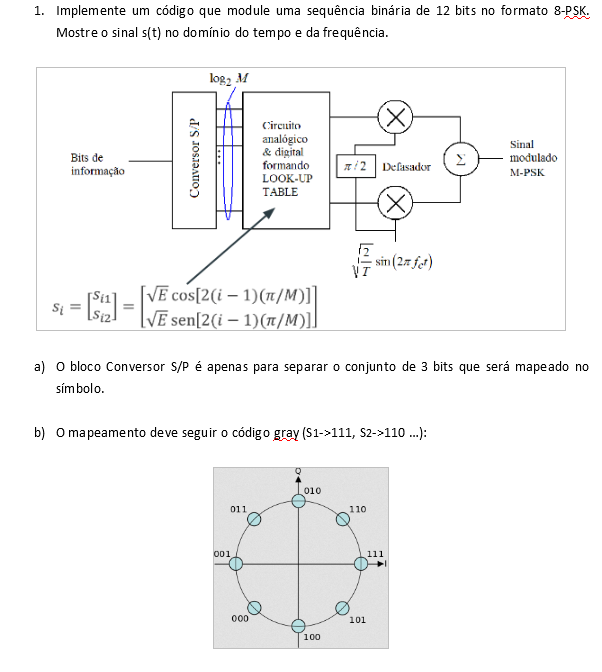

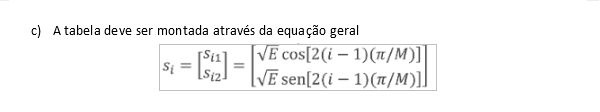

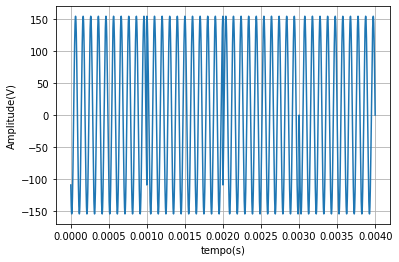

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

#bits = np.array([1,1,1,1,1,0,0,0,0,0,1,1])
bits = np.random.randint(2, size=12)

table = {   # M=3 mapeamento gray
    1:[1,1,1],
    2:[1,1,0],
    3:[0,1,0],
    4:[0,1,1],
    5:[0,0,1],
    6:[0,0,0],
    7:[1,0,0],
    8:[1,0,1]
}

def conv_sp(bits, p):                      #converte serial para paralelo
  return np.reshape(bits,(-1, p))

def get_key(val):
  for key,value in table.items():
    if np.array_equal(val, value):
      return key
  return "simbolo não encontrado"

def s(i, E, M):
  return ( np.sqrt(E)*np.cos(2*(i-1)*(np.pi/M)) , np.sqrt(E)*np.sin(2*(i-1)*(np.pi/M)) )

def freq_shift(s, fc, t):
  return ( s[0]*np.sqrt(2/t[-1])*np.cos(2*np.pi*fc*t) + s[1]*np.sqrt(2/t[-1])*np.sin(2*np.pi*fc*t) )

E = 12
M = 8
fc = 1e4
Ts = 1e-3
qpsk = []
ts = np.linspace(0, Ts, 1000)

signal = conv_sp(bits, 3)
for simb in signal:
  i = get_key(simb)
  qpsk = np.append(qpsk, freq_shift(s(i, E, M), fc, ts))

t = np.linspace(0, Ts*signal.shape[0], qpsk.size)
plt.plot(t,qpsk)
plt.xlabel("tempo(s)")
plt.ylabel("Amplitude(V)")
plt.grid()

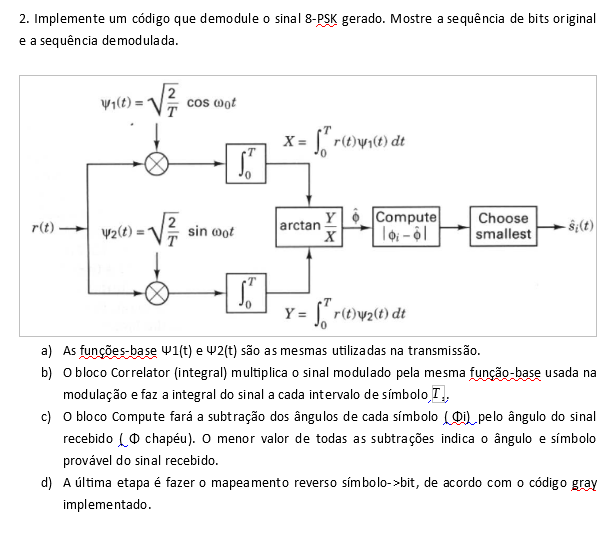

[  0.  45.  90. 135. 180. 225. 270. 315. 360.]
[223.67123714 359.54988747 135.4285378  271.35033758]
[0 0 0 1 1 1 0 1 1 1 0 0]
[0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.]


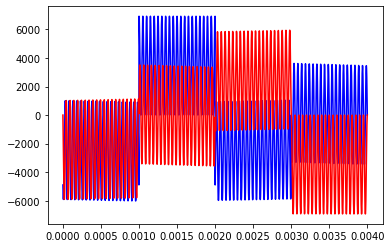

In [40]:
psi_1 = np.sqrt(2/Ts)*np.cos(2*np.pi*fc*t)
psi_2 = np.sqrt(2/Ts)*np.sin(2*np.pi*fc*t)

a1 = qpsk*psi_1
a2 = qpsk*psi_2

plt.plot(t,a1,color='blue')
plt.plot(t,a2,color='red')

#correlator
from scipy.integrate import simps

X = np.array([]);
Y = np.array([]);
for x in range(signal.shape[0]):
  X  = np.append(X, simps(a1[ts.size*x:ts.size*(x+1)],ts));
  Y  = np.append(Y, simps(a2[ts.size*x:ts.size*(x+1)],ts));

phi_received = np.array([])
phi_received = (np.arctan2(Y,X)*180/np.pi + 360) % 360
#phi_received = (np.arctan2(Y,X)*180/np.pi)

#compute
phi_constelacao = np.array ([])
for i in range(1,M+2):
  phi_constelacao = np.append(phi_constelacao, (2*(i-1)*(180/M)))

print(phi_constelacao)

index = []
for i in phi_received:
  index.append(np.argmin(abs(i-phi_constelacao)))

bits_received = np.array([])

for x in index:
  if x == M:
    x=0
  bits_received = np.append(bits_received, table[x+1])

print(phi_received)
#print(index)
print(bits)
print(bits_received)